# **Laboratorio 2**

## **Punto 1**

Cree una función llamada myint pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con int(0b1000011100001)

In [7]:
def myint(bin_number, tolerancia=1e-6, maxiter=100):
    """
    Convierte un número binario de 16 bits (entero) a su valor decimal,
    de forma iterativa y controlada con tolerancia.
    """
    bin_str = bin(bin_number)[2:].zfill(16)

    valor = 0
    prev_valor = -1

    for _ in range(maxiter):
        prev_valor = valor
        valor = 0
        for i in range(16):
            if bin_str[i] == '1':
                # Simulamos acumulación parcial en cada iteración
                valor += 2**(15 - i)
        # Como este cálculo es determinista, esto lo detendrá de inmediato
        if abs(valor - prev_valor) < tolerancia:
            break

    return valor


In [10]:
bin_input = 0b1000011100001  # Este es 0b0001000011100001 en 16 bits
resultado_myint = myint(bin_input)
resultado_builtin = int(bin_input)

print("myint:", resultado_myint)
print("int:", resultado_builtin)
print("¿Coinciden?", resultado_myint == resultado_builtin)


myint: 4321
int: 4321
¿Coinciden? True


## **Punto 2**

Generar una función llamada number64 para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

number64("0100000000111011100100001111111111111111111111111111111111111111")

In [11]:
def number64(bin_str):
    """
    Convierte un número binario de 64 bits (como cadena) al valor real según IEEE 754 doble precisión.
    """
    if len(bin_str) != 64:
        raise ValueError("La cadena debe tener exactamente 64 bits.")

    # 1. Bit de signo
    signo = int(bin_str[0])

    # 2. Exponente (11 bits)
    exp_bits = bin_str[1:12]
    exponente = int(exp_bits, 2) - 1023  # Sesgo de 1023

    # 3. Mantisa (52 bits)
    mantisa_bits = bin_str[12:]
    mantisa = 0.0
    for i, bit in enumerate(mantisa_bits):
        if bit == '1':
            mantisa += 2 ** -(i + 1)

    # 4. Valor final
    valor = (-1)**signo * (1 + mantisa) * 2**exponente
    return valor


In [12]:
binary_input = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(binary_input)
print("Resultado:", resultado)


Resultado: 27.566406249999996


## **Punto 3**

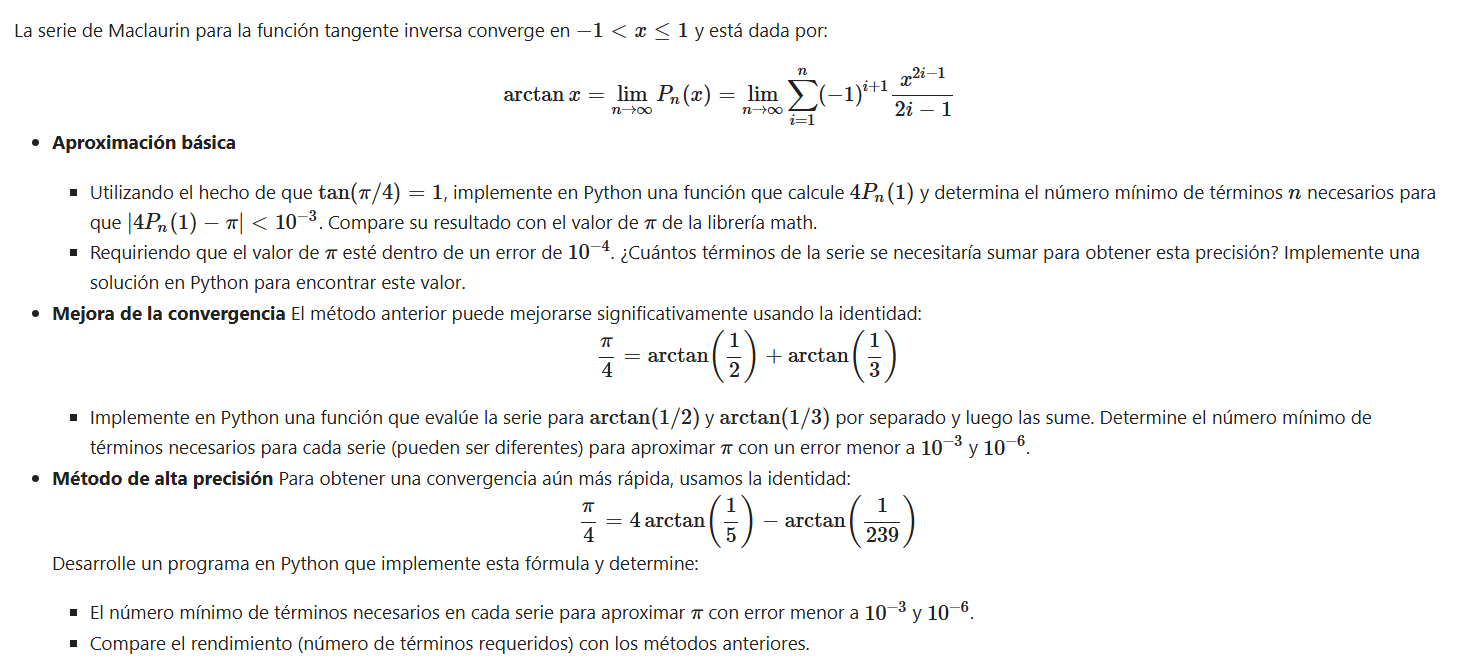

**Método de Aproximación Básica**

In [53]:
import math

def aproximacion_basica(x, tolerancia, maxiter):
    """Aproxima arctan(x) y calcula π como 4 * arctan(1)."""
    suma = 0
    n=0
    for i in range(maxiter):
        termino = ((-1)**i) * (x**(2*i+1)) / (2*i+1)
        suma += termino
        n+=1
        pi_aprox = 4 * suma
        if abs(pi_aprox - math.pi) < tolerancia:
            return pi_aprox, n
    return pi_aprox, n  # En caso de no alcanzar la tolerancia

# Prueba
x = 1
tolerancia = 1e-3
maxiter = 100000
pi_estimado, iteraciones = aproximacion_basica(x, tolerancia, maxiter)

print(f"Aproximación de π: {pi_estimado} con {iteraciones} iteraciones")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")

# Prueba
x = 1
tolerancia = 1e-4
maxiter = 100000
pi_estimado, iteraciones = aproximacion_basica(x, tolerancia, maxiter)

print(f"Aproximación de π: {pi_estimado} con {iteraciones} iteraciones")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")

Aproximación de π: 3.140592653839794 con 1000 iteraciones
Error absoluto: 0.000999999749998981
Aproximación de π: 3.1414926535900345 con 10000 iteraciones
Error absoluto: 9.99999997586265e-05


**Mejora de Convergencia**

In [56]:
def arctan_series(x, tolerancia, maxiter):
    """Calcula arctan(x) usando la serie de Maclaurin con tolerancia dada."""
    suma = 0
    for i in range(maxiter):
        termino = ((-1)**i) * (x**(2*i+1)) / (2*i+1)
        suma += termino
        if abs(termino) < tolerancia:
            return suma, i+1
    return suma, maxiter  # Si no alcanza tolerancia

def mejora_convergencia(tolerancia, maxiter):
    """Aproxima π usando arctan(1/2) + arctan(1/3)."""
    arctan_1_2, iteraciones_1_2 = arctan_series(1/2, tolerancia, maxiter)
    arctan_1_3, iteraciones_1_3 = arctan_series(1/3, tolerancia, maxiter)
    
    pi_aprox = 4 * (arctan_1_2 + arctan_1_3)
    return pi_aprox, iteraciones_1_2, iteraciones_1_3

tolerancia = 1e-6
maxiter = 1000
pi_estimado, iteraciones_1_2, iteraciones_1_3 = mejora_convergencia(tolerancia, maxiter)

print(f"Aproximación de π: {pi_estimado}")
print(f"Iteraciones necesarias en arctan(1/2): {iteraciones_1_2}")
print(f"Iteraciones necesarias en arctan(1/3): {iteraciones_1_3}")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")
#Prueba 1
tolerancia = 1e-3
maxiter = 1000
pi_estimado, iteraciones_1_2, iteraciones_1_3 = mejora_convergencia(tolerancia, maxiter)
#Prueba 2
print(f"Aproximación de π: {pi_estimado}")
print(f"Iteraciones necesarias en arctan(1/2): {iteraciones_1_2}")
print(f"Iteraciones necesarias en arctan(1/3): {iteraciones_1_3}")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")

Aproximación de π: 3.1415928051045654
Iteraciones necesarias en arctan(1/2): 9
Iteraciones necesarias en arctan(1/3): 6
Error absoluto: 1.5151477228414478e-07
Aproximación de π: 3.1419799015285124
Iteraciones necesarias en arctan(1/2): 5
Iteraciones necesarias en arctan(1/3): 3
Error absoluto: 0.00038724793871924845


**Método de Alta Precisión**

In [59]:
def alta_precision(tolerancia, maxiter):
    """Aproxima π usando 4 * arctan(1/5) - arctan(1/239)."""
    arctan_1_5, iteraciones_1_5 = arctan_series(1/5, tolerancia, maxiter)
    arctan_1_239, iteraciones_1_239 = arctan_series(1/239, tolerancia, maxiter)
    
    pi_aprox = 4 * (4 * arctan_1_5 - arctan_1_239)
    return pi_aprox, iteraciones_1_5, iteraciones_1_239
#Prueba 1
tolerancia = 1e-6
maxiter = 1000
pi_estimado, iteraciones_1_5, iteraciones_1_239 = alta_precision(tolerancia, maxiter)

print(f"Aproximación de π: {pi_estimado}")
print(f"Iteraciones en arctan(1/5): {iteraciones_1_5}")
print(f"Iteraciones en arctan(1/239): {iteraciones_1_239}")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")
#Prueba 2
tolerancia = 1e-3
maxiter = 1000
pi_estimado, iteraciones_1_5, iteraciones_1_239 = alta_precision(tolerancia, maxiter)

print(f"Aproximación de π: {pi_estimado}")
print(f"Iteraciones en arctan(1/5): {iteraciones_1_5}")
print(f"Iteraciones en arctan(1/239): {iteraciones_1_239}")
print(f"Error absoluto: {abs(pi_estimado - math.pi)}")

Aproximación de π: 3.141592682405425
Iteraciones en arctan(1/5): 5
Iteraciones en arctan(1/239): 2
Error absoluto: 2.8815632102663358e-08
Aproximación de π: 3.1416210293260605
Iteraciones en arctan(1/5): 3
Iteraciones en arctan(1/239): 2
Error absoluto: 2.8375736267349794e-05


Se puede notar que el método más preciso es el último, puesto que da una mejor precisión con uno menor cantidad de términos

## **Punto 4**

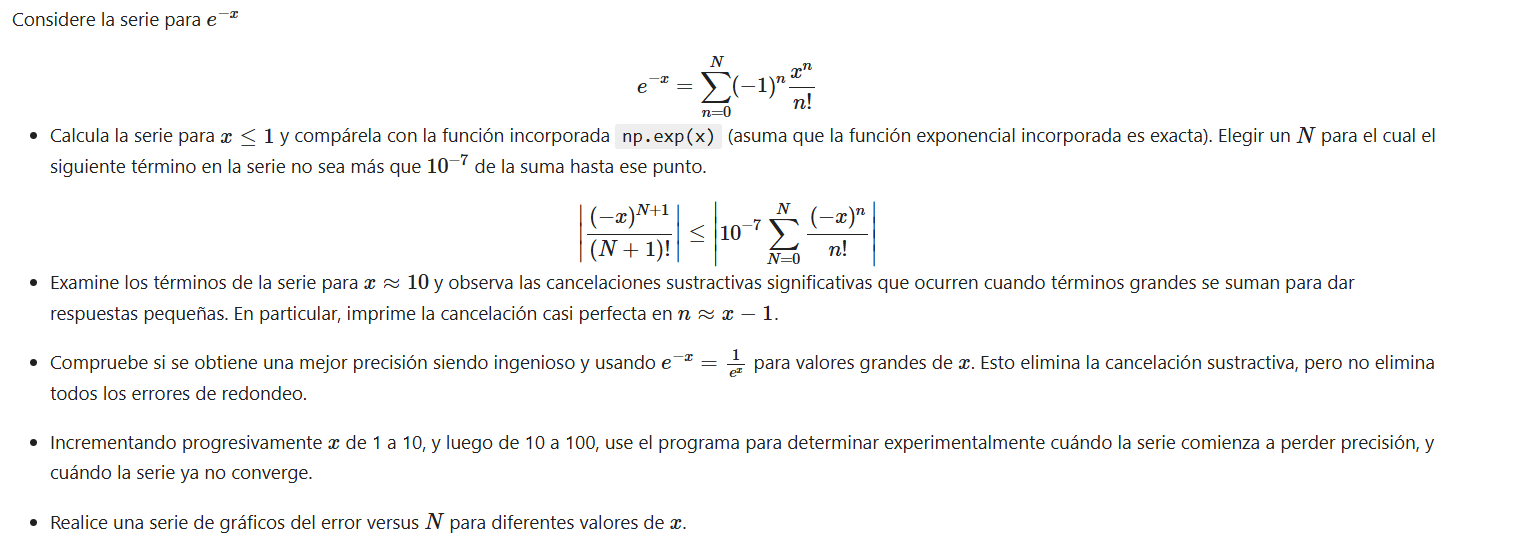

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math 
def serie_exponencial(x, tol=1e-7, maxiter=100):
    """
    Calcula e^{-x} usando la serie de Maclaurin.
    
    Parámetros:
        x : float
        tol : float (tolerancia para el término más pequeño)
        maxiter : int (número máximo de iteraciones)
    
    Retorna:
        valor_aproximado, N, lista_terminos
    """
    suma = 0
    terminos = []
    for n in range(maxiter):
        term = ((-1)**n * x**n) / math.factorial(n)
        terminos.append(term)
        suma += term
        if abs(term) < tol:
            break
    return suma, n, terminos


In [68]:
serie_exponencial(1)

(0.367879439233606,
 11,
 [1.0,
  -1.0,
  0.5,
  -0.16666666666666666,
  0.041666666666666664,
  -0.008333333333333333,
  0.001388888888888889,
  -0.0001984126984126984,
  2.48015873015873e-05,
  -2.7557319223985893e-06,
  2.755731922398589e-07,
  -2.505210838544172e-08])

In [71]:
import numpy as np

def imprimir_terminos_serie(x, tol=1e-7, maxiter=100):
    """
    Imprime los términos individuales de la serie de Maclaurin para e^{-x}
    y analiza la cancelación sustractiva para x ~ 10.
    """
    suma = 0.0
    print(f"Analizando los términos de la serie para x = {x}:\n")
    print("{:<8s} {:<20s} {:<20s}".format("n", "Término", "Suma Parcial"))
    print("-" * 50)

    for n in range(maxiter):
        term = ((-1)**n * x**n) / math.factorial(n)
        suma += term
        print("{:<8d} {:<20.10e} {:<20.10e}".format(n, term, suma))
        
        # Detenernos si el término ya es suficientemente pequeño
        if abs(term) < tol:
            break

    exacto = np.exp(-x)
    print("\nValor exacto usando np.exp(-x): {:.10e}".format(exacto))
    print("Diferencia absoluta: {:.2e}".format(abs(exacto - suma)))

# Ejecutar análisis para x ≈ 10
imprimir_terminos_serie(x=10)


Analizando los términos de la serie para x = 10:

n        Término              Suma Parcial        
--------------------------------------------------
0        1.0000000000e+00     1.0000000000e+00    
1        -1.0000000000e+01    -9.0000000000e+00   
2        5.0000000000e+01     4.1000000000e+01    
3        -1.6666666667e+02    -1.2566666667e+02   
4        4.1666666667e+02     2.9100000000e+02    
5        -8.3333333333e+02    -5.4233333333e+02   
6        1.3888888889e+03     8.4655555556e+02    
7        -1.9841269841e+03    -1.1375714286e+03   
8        2.4801587302e+03     1.3425873016e+03    
9        -2.7557319224e+03    -1.4131446208e+03   
10       2.7557319224e+03     1.3425873016e+03    
11       -2.5052108385e+03    -1.1626235370e+03   
12       2.0876756988e+03     9.2505216183e+02    
13       -1.6059043837e+03    -6.8085222185e+02   
14       1.1470745598e+03     4.6622233792e+02    
15       -7.6471637318e+02    -2.9849403526e+02   
16       4.7794773324e+02     1.

Como se puede observar, en algunos casos dos términos son extremadamente similares entre sí.

x     Error Serie          Error 1/exp(x)      
--------------------------------------------------
10    9.84e-09             6.78e-21            
15    1.09e-08             0.00e+00            
20    1.07e-08             0.00e+00            
25    6.46e-07             1.62e-27            
30    8.55e-05             1.26e-29            
35    8.23e-03             0.00e+00            
40    1.23e+02             0.00e+00            
45    1.55e+07             0.00e+00            
50    5.65e+11             2.35e-38            


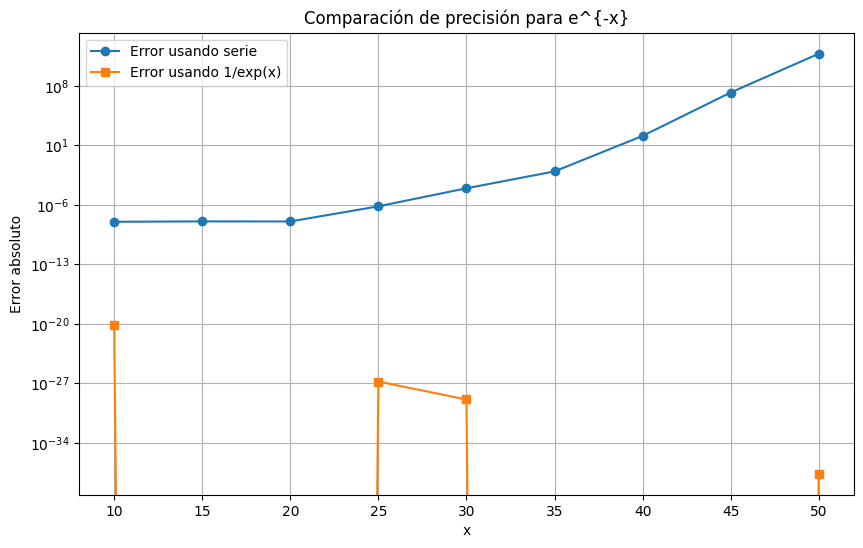

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def serie_exponencial(x, tol=1e-7, maxiter=100):
    suma = 0.0
    for n in range(maxiter):
        term = ((-1)**n * x**n) / math.factorial(n)
        suma += term
        if abs(term) < tol:
            break
    return suma

def evaluar_con_estrategia(x, tol=1e-7, maxiter=100):
    """
    Compara la serie de Maclaurin vs 1/exp(x) para e^{-x}
    """
    aproximacion_serie = serie_exponencial(x, tol, maxiter)
    mejor_aproximacion = 1.0 / np.exp(x)
    valor_real = np.exp(-x)

    error_serie = abs(valor_real - aproximacion_serie)
    error_mejor = abs(valor_real - mejor_aproximacion)

    return aproximacion_serie, mejor_aproximacion, valor_real, error_serie, error_mejor

# Evaluar para valores grandes de x
valores_x = list(range(10, 51, 5))  # x = 10, 15, ..., 50
errores_serie = []
errores_mejor = []

print(f"{'x':<5} {'Error Serie':<20} {'Error 1/exp(x)':<20}")
print("-" * 50)
for x in valores_x:
    _, _, _, error_serie, error_mejor = evaluar_con_estrategia(x)
    errores_serie.append(error_serie)
    errores_mejor.append(error_mejor)
    print(f"{x:<5} {error_serie:<20.2e} {error_mejor:<20.2e}")

# Graficar errores
plt.figure(figsize=(10, 6))
plt.semilogy(valores_x, errores_serie, label="Error usando serie", marker='o')
plt.semilogy(valores_x, errores_mejor, label="Error usando 1/exp(x)", marker='s')
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.title("Comparación de precisión para e^{-x}")
plt.grid(True)
plt.legend()
plt.show()


La serie comienza a perder precisión apreciable (error > 1e-5) a partir de x ≈ 29


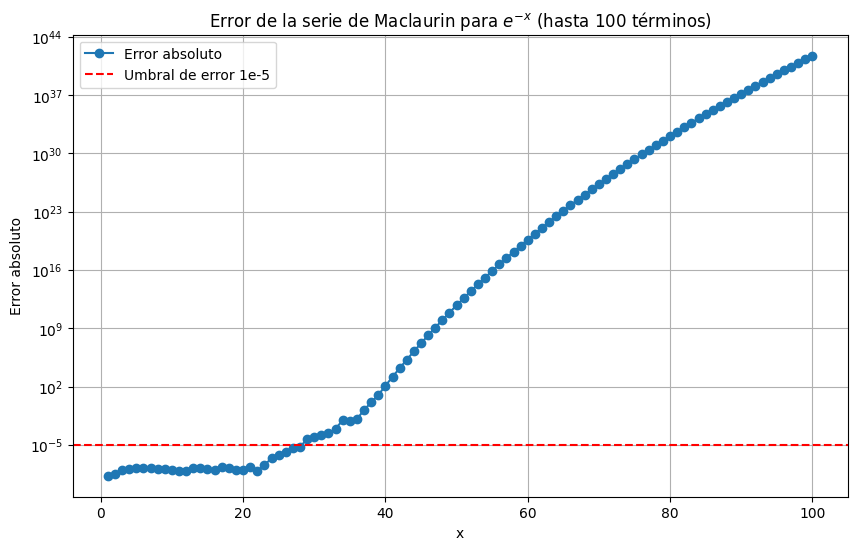

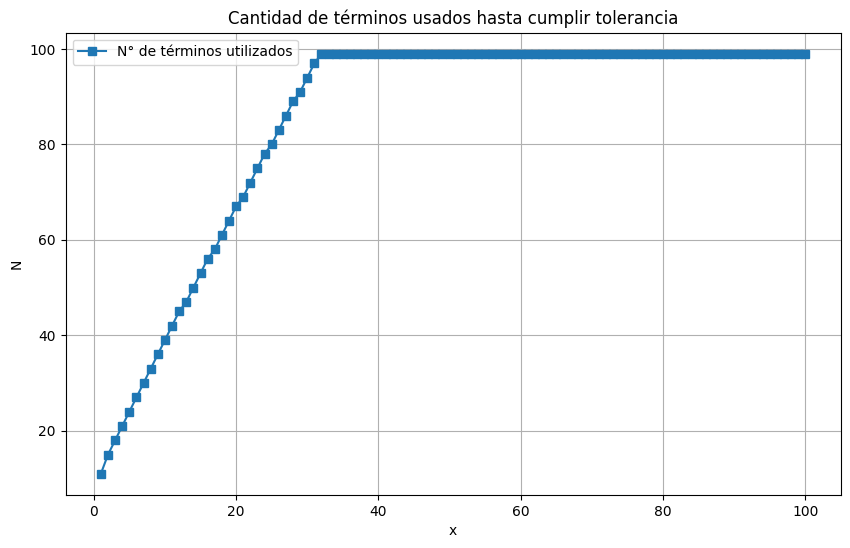

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def serie_exponencial_neg(x, tol=1e-7, maxiter=100):
    suma = 0.0
    for n in range(maxiter):
        term = ((-1)**n * x**n) / math.factorial(n)
        suma += term
        if abs(term) < tol:
            break
    return suma, n  # Devolvemos también cuántos términos se usaron

# Rango de x para probar (de 1 a 100)
valores_x = list(range(1, 101))
errores = []
n_terminos = []

for x in valores_x:
    approx, n_used = serie_exponencial_neg(x, tol=1e-7, maxiter=100)
    real = np.exp(-x)
    error = abs(real - approx)
    errores.append(error)
    n_terminos.append(n_used)

# Detectar cuándo el error supera ciertos umbrales
umbral_error = 1e-5  # Consideramos que pierde precisión a este nivel
indices_error_grande = [x for x, err in zip(valores_x, errores) if err > umbral_error]

if indices_error_grande:
    x_inicio_problemas = indices_error_grande[0]
else:
    x_inicio_problemas = None

# Imprimir resultado experimental
print(f"La serie comienza a perder precisión apreciable (error > 1e-5) a partir de x ≈ {x_inicio_problemas}")

# Graficar errores
plt.figure(figsize=(10, 6))
plt.semilogy(valores_x, errores, label="Error absoluto", marker='o')
plt.axhline(1e-5, color='r', linestyle='--', label="Umbral de error 1e-5")
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.title("Error de la serie de Maclaurin para $e^{-x}$ (hasta 100 términos)")
plt.grid(True)
plt.legend()
plt.show()

# Graficar número de términos usados
plt.figure(figsize=(10, 6))
plt.plot(valores_x, n_terminos, label="N° de términos utilizados", marker='s')
plt.xlabel("x")
plt.ylabel("N")
plt.title("Cantidad de términos usados hasta cumplir tolerancia")
plt.grid(True)
plt.legend()
plt.show()


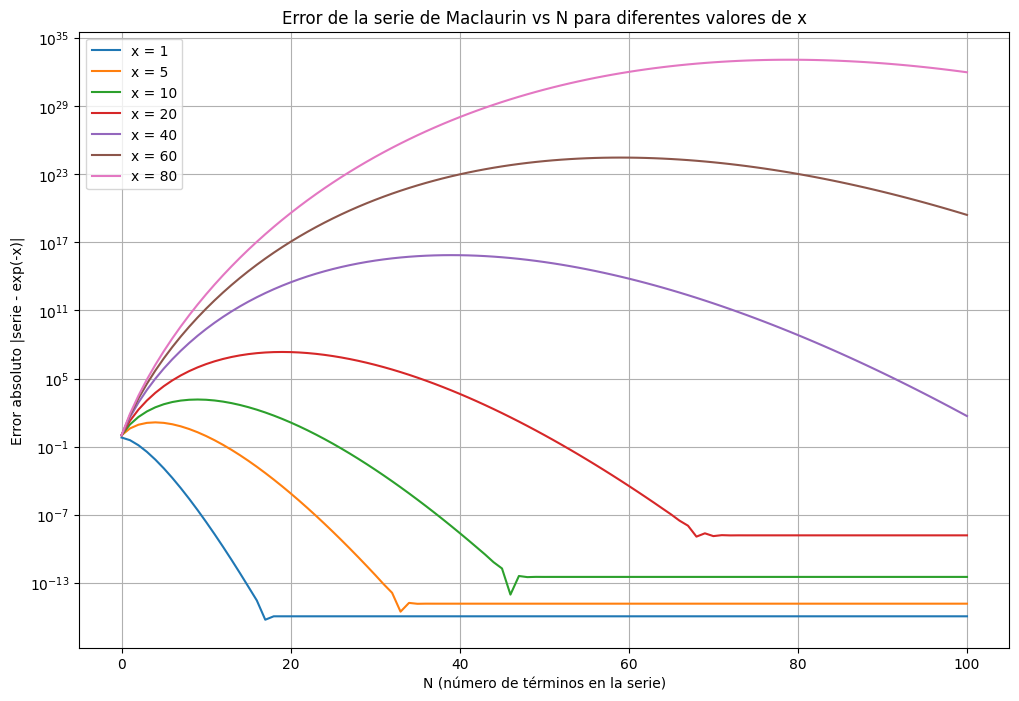

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def error_serie_vs_N(x, max_N=100):
    errores = []
    suma = 0.0
    real = np.exp(-x)

    for N in range(max_N + 1):
        term = ((-1)**N * x**N) / math.factorial(N)
        suma += term
        error = abs(suma - real)
        errores.append(error)
    
    return errores

# Valores de x que vamos a analizar
valores_x = [1, 5, 10, 20, 40, 60, 80]

# Crear los gráficos del error vs N
plt.figure(figsize=(12, 8))

for x in valores_x:
    errores = error_serie_vs_N(x, max_N=100)
    plt.semilogy(range(101), errores, label=f"x = {x}")

plt.xlabel("N (número de términos en la serie)")
plt.ylabel("Error absoluto |serie - exp(-x)|")
plt.title("Error de la serie de Maclaurin vs N para diferentes valores de x")
plt.grid(True)
plt.legend()
plt.show()


## **Punto 5**

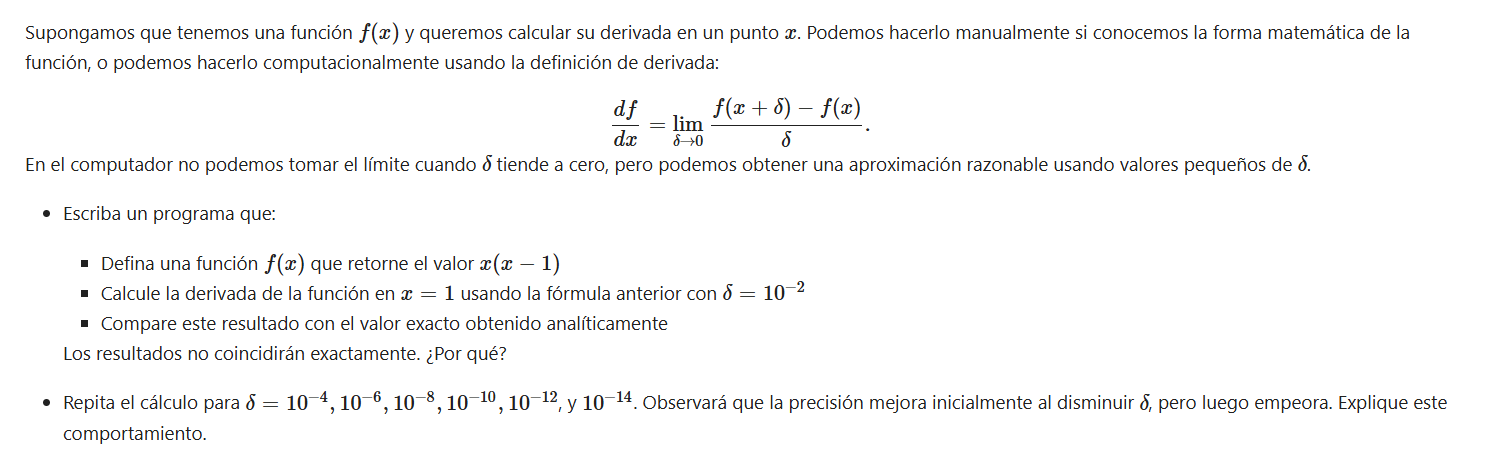

δ = 1e-02, derivada ≈ 1.010000000000, error = 1.00e-02
δ = 1e-04, derivada ≈ 1.000100000000, error = 1.00e-04
δ = 1e-06, derivada ≈ 1.000000999918, error = 1.00e-06
δ = 1e-08, derivada ≈ 1.000000003923, error = 3.92e-09
δ = 1e-10, derivada ≈ 1.000000082840, error = 8.28e-08
δ = 1e-12, derivada ≈ 1.000088900583, error = 8.89e-05
δ = 1e-14, derivada ≈ 0.999200722163, error = 7.99e-04


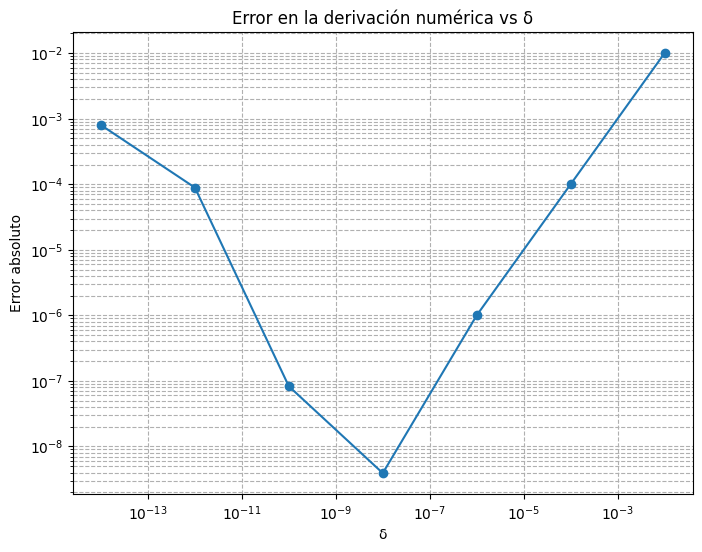

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función f(x)
def f(x):
    return x * (x - 1)

# Derivada analítica: f'(x) = 2x - 1
def derivada_analitica(x):
    return 2 * x - 1

# Punto donde se calcula la derivada
x0 = 1
valor_real = derivada_analitica(x0)

# Valores de delta que vamos a probar
deltas = [10**(-i) for i in range(2, 15, 2)]

# Guardar errores
errores = []

# Aproximación de la derivada y error
for delta in deltas:
    derivada_aprox = (f(x0 + delta) - f(x0)) / delta
    error = abs(derivada_aprox - valor_real)
    errores.append(error)
    print(f"δ = {delta:.0e}, derivada ≈ {derivada_aprox:.12f}, error = {error:.2e}")

# Gráfica de error vs delta
plt.figure(figsize=(8,6))
plt.loglog(deltas, errores, marker='o')
plt.xlabel("δ")
plt.ylabel("Error absoluto")
plt.title("Error en la derivación numérica vs δ")
plt.grid(True, which="both", ls="--")
plt.show()


Esto es debido que en f(x+δ)-f(x) al ser δ muy pequeño, llega un punto en el